<a href="https://colab.research.google.com/github/silent-developer/100-Days-Of-ML-Code/blob/master/ecg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulating heart ecg


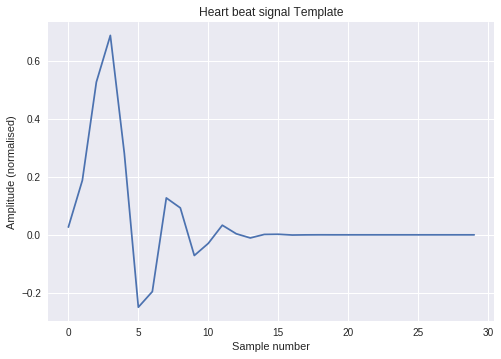

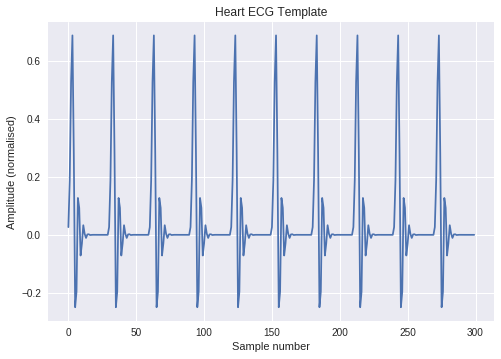

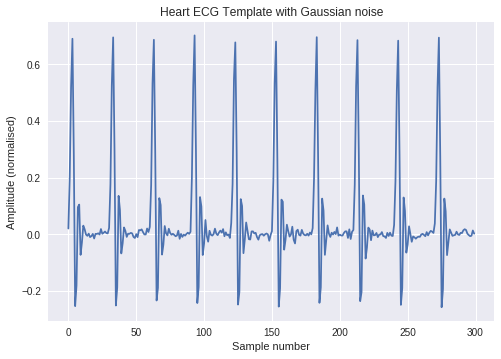

TypeError: ignored

In [0]:
import pylab
import scipy.signal as signal
import numpy 

print('Simulating heart ecg')

# The "Daubechies" wavelet is a rough approximation to a real,
# single, heart beat ("pqrst") signal
pqrst = signal.wavelets.daub(10)

# Add the gap after the pqrst when the heart is resting. 
samples_rest = 10
zero_array = numpy.zeros(samples_rest, dtype=float)
pqrst_full = numpy.concatenate([pqrst,zero_array])

# Plot the heart signal template
pylab.plot(pqrst_full)
pylab.xlabel('Sample number')
pylab.ylabel('Amplitude (normalised)')
pylab.title('Heart beat signal Template')
pylab.show()

# Simulated Beats per minute rate
# For a health, athletic, person, 60 is resting, 180 is intensive exercising
bpm = 60
bps = bpm / 60

# Simumated period of time in seconds that the ecg is captured in
capture_length = 10

# Caculate the number of beats in capture time period 
# Round the number to simplify things
num_heart_beats = int(capture_length * bps)

# Concatonate together the number of heart beats needed
ecg_template = numpy.tile(pqrst_full , num_heart_beats)

# Plot the heart ECG template
pylab.plot(ecg_template)
pylab.xlabel('Sample number')
pylab.ylabel('Amplitude (normalised)')
pylab.title('Heart ECG Template')
pylab.show()

# Add random (gaussian distributed) noise 
noise = numpy.random.normal(0, 0.01, len(ecg_template))
ecg_template_noisy = noise + ecg_template

# Plot the noisy heart ECG template
pylab.plot(ecg_template_noisy)
pylab.xlabel('Sample number')
pylab.ylabel('Amplitude (normalised)')
pylab.title('Heart ECG Template with Gaussian noise')
pylab.show()


# Simulate an ADC by sampling the noisy ecg template to produce the values
# Might be worth checking nyquist here 
# e.g. sampling rate >= (2 * template sampling rate)
sampling_rate = 50.0
num_samples = sampling_rate * capture_length
ecg_sampled = signal.resample(ecg_template_noisy, num_samples)

# Scale the normalised amplitude of the sampled ecg to whatever the ADC 
# bit resolution is
# note: check if this is correct: not sure if there should be negative bit values. 
adc_bit_resolution = 1024
ecg =  adc_bit_resolution * ecg_sampled

# Plot the sampled ecg signal
pylab.plot(ecg)
pylab.xlabel('Sample number')
pylab.ylabel('bit value')
pylab.title('%d bpm ECG signal with gaussian noise sampled at %d Hz' %(bpm, sampling_rate) )
pylab.show()

print('saving ecg values to file')
numpy.savetxt("ecg_values.csv", ecg, delimiter=",")
print('Done')